In [1]:
# !pip install snscrape
# !pip install pyclustering
# !pip install wordcloud

In [2]:
# def clean_text(df, text_field):
#     df[text_field] = df[text_field].str.lower()
#     df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0–9]+)|([0-9A-Za-z\t])|(\w+:\/\/\S+)|^rt|http.+?", "",   elem)) 
#     return df

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import numpy as np
from tqdm import tqdm
from wordcloud import WordCloud,STOPWORDS
from multiprocessing import Pool
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_pickle("./vegan_tweets2010-2022_monthly.pkl")

In [4]:
df["Text"] = df["Text"].apply(lambda x: x.lower())

In [5]:
df.describe()

,Tweet Id,replyCount,retweetCount,likeCount,quoteCount
count,1.136770e+05,113677.000000,113677.000000,113677.000000,113677.000000
mean,7.396452e+17,0.328853,0.528603,3.144655,0.048154
std,4.674333e+17,3.921993,23.023366,344.353841,4.196721
min,7.313936e+09,0.000000,0.000000,0.000000,0.000000
25%,3.290187e+17,0.000000,0.000000,0.000000,0.000000
50%,7.483031e+17,0.000000,0.000000,0.000000,0.000000
75%,1.145107e+18,0.000000,0.000000,1.000000,0.000000
max,1.527700e+18,1119.000000,7492.000000,115499.000000,1398.000000


In [6]:
df["year"] = df["Datetime"].apply(lambda x: x.year)
df["month"] = df["Datetime"].apply(lambda x: x.month)
df["day"] = df["Datetime"].apply(lambda x: x.day)
df["weekday"] = df["Datetime"].apply(lambda x: x.weekday)
df["hour"] = df["Datetime"].apply(lambda x: x.hour)

<AxesSubplot:>

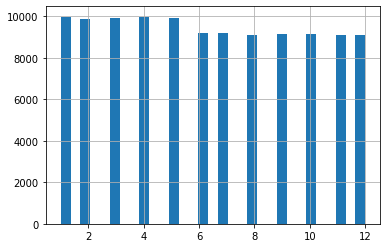

In [7]:
df["month"].hist(bins=31)

<AxesSubplot:>

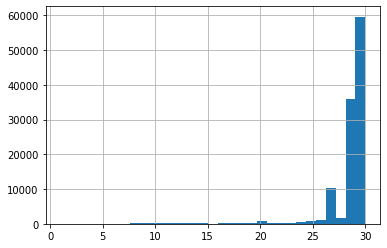

In [8]:
df["day"].hist(bins=31)

<AxesSubplot:>

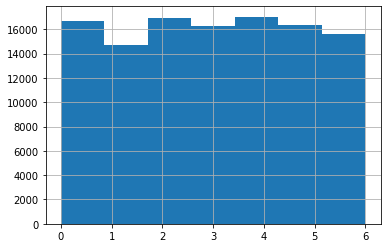

In [9]:
df["weekday"].hist(bins=7)

<AxesSubplot:>

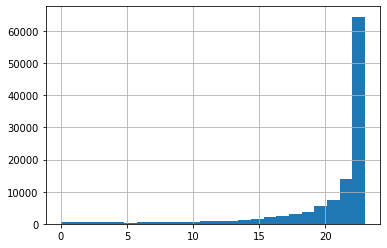

In [10]:
df["hour"].hist(bins=24)

<AxesSubplot:>

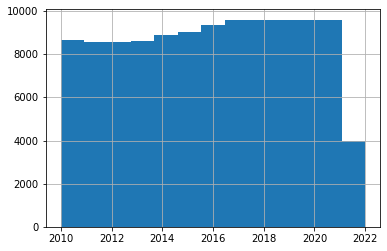

In [11]:
df["year"].hist(bins=13)

In [12]:
df.head()

,Datetime,Tweet Id,Text,Username,Query,replyCount,retweetCount,likeCount,quoteCount,lang,source,retweetedTweet,quotedTweet,mentionedUsers,year,month,day,weekday,hour
0,2010-01-30 23:59:47+00:00,8430272628,@twinz2 well help me understand how that relat...,IQXS,vegan,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,[https://twitter.com/Twinz2],2010,1,30,5,23
1,2010-01-30 23:58:21+00:00,8430226196,"okay, maybe i'm not making vegan alfredo saude...",desdemona,vegan,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,None,2010,1,30,5,23
2,2010-01-30 23:57:14+00:00,8430191199,via @feelgoodguru: no oil #vegan pesto ~ easy-...,itsallgood3sm,vegan,0,0,0,0,en,"<a href=""http://www.cloudhopper.com/"" rel=""nof...",None,None,[https://twitter.com/feelgoodguru],2010,1,30,5,23
3,2010-01-30 23:56:25+00:00,8430165062,just had a delicious vegan meal @ jean's kitch...,RachelLagroix,vegan,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,None,2010,1,30,5,23
4,2010-01-30 23:56:19+00:00,8430161604,@secretkgb says: i like how this bbq sauce is ...,annesmash,vegan,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,[https://twitter.com/secretKGB],2010,1,30,5,23


In [13]:
#Cleaning up text column
keywords = ['vegan',
'plantbased', 
'healthy',
'vegetarian',
'veggie',
'veganism', 
'cruelty',
'crueltyfree',
'plant',
'milk', 
'beyond', 
'meat',
'tofu',
'free']


words = ' '.join(df['Text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])


In [14]:
kflags = [
'vegan',
'healthy',
'vegetarian',
'veggie',
'cruelty',
'plant',
'milk', 
'beyond', 
'meat',
'tofu',
'free']

kflags = {
"vegan":["vegan"], 
"plant based":[
"plantbased", 
"plant-based",
"plant based"
],
"vegetarian":["vegetarian"],
"veggie":["veggie"],
"veganism":["veganism"], 
"cruelty-free":[
    "cruelty-free",
    "cruelty free",
    "crueltyfree"
],
# "plant milk":[
#     "plant milk",
#     "plant-milk",
#     "plantmilk",
# ],
"tofu":["tofu"],
"healthy":["healthy"]
}    

for field,kwords in kflags.items():
    res = []
    for kword in kwords:
        res.append(df["Text"].str.contains(kword))
    if len(res)>1:
        for i in range(1,len(res)-1):
            res[0] = res[0] + res[i]
    df[field] = res[0]

In [15]:
#Set up and generate word cloud
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)


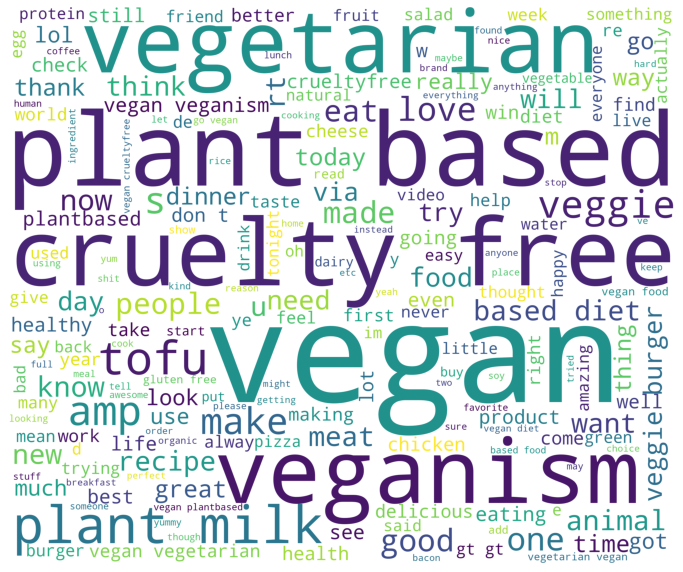

In [16]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [17]:
# STOPWORDS = STOPWORDS.union(keywords)
# #Set up and generate word cloud
# wordcloud = WordCloud(stopwords=STOPWORDS,
#                       background_color='white',
#                       width=3000,
#                       height=2500
#                      ).generate(cleaned_word)

In [18]:
# plt.figure(1,figsize=(12, 12))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

In [19]:
dfagg = df.groupby(["year","month","day"]).sum()

In [20]:
dfagg.tail()

Tweet Id  replyCount  retweetCount  likeCount  quoteCount  \
year month day                                                                  
2022 4     29   1.083880e+21       382.0         693.0     3495.0        48.0   
     5     17   3.053327e+19         7.0           3.0       27.0         1.0   
           18   3.969878e+19         9.0           1.0       30.0         0.0   
           19   3.818220e+19        20.0           0.0       30.0         1.0   
           20   1.113682e+21       183.0         101.0      641.0         7.0   

                weekday     hour  vegan  plant based  vegetarian  veggie  \
year month day                                                             
2022 4     29    2852.0  15611.0    307           83         115      99   
     5     17      20.0    402.0      3            1           0       0   
           18      52.0    267.0      2            1           0       0   
           19      75.0    337.0      0            0           0       0   
           20    2916.0  11559.0    288           59         105      55   

                veganism  cruelty-free  tofu  healthy  
year month day                                         
2022 4     29        109            64   104       14  
     5     17          0             0     1        1  
           18          0             0     1        0  
           19          0             0     0        0  
           20        104            65   106       17

In [21]:
# dfagg[["plant milk","tofu"]].plot.line(figsize=(15,15))

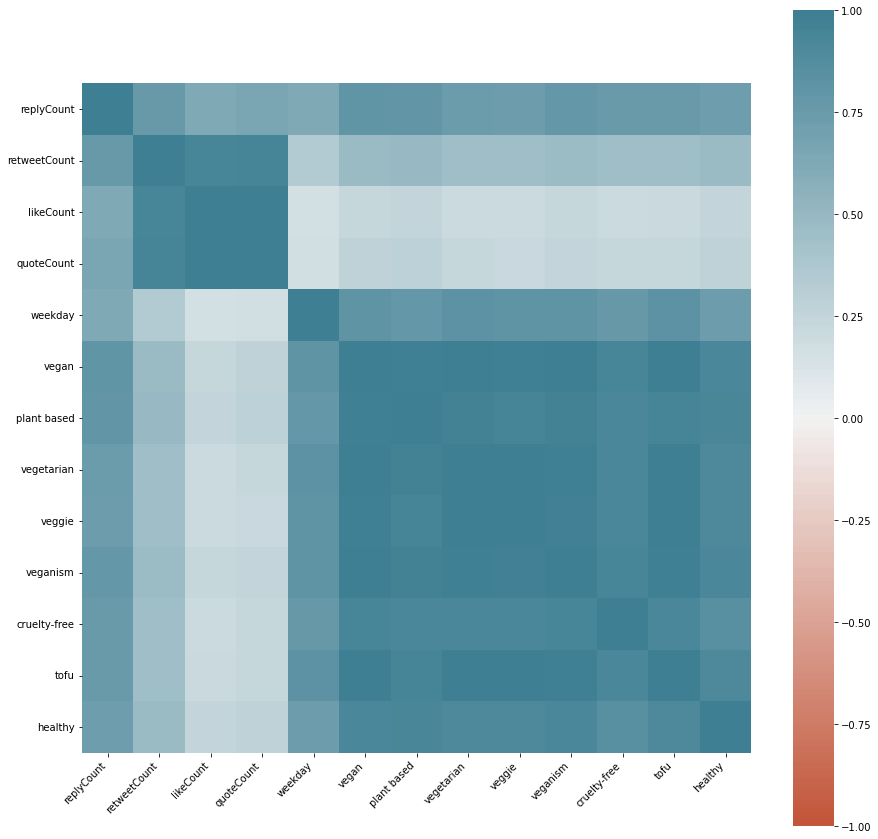

In [22]:


corr = dfagg[["replyCount","retweetCount","likeCount","quoteCount","weekday"]+list(kflags.keys())].corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [23]:
corr.to_excel("corr.xlsx")

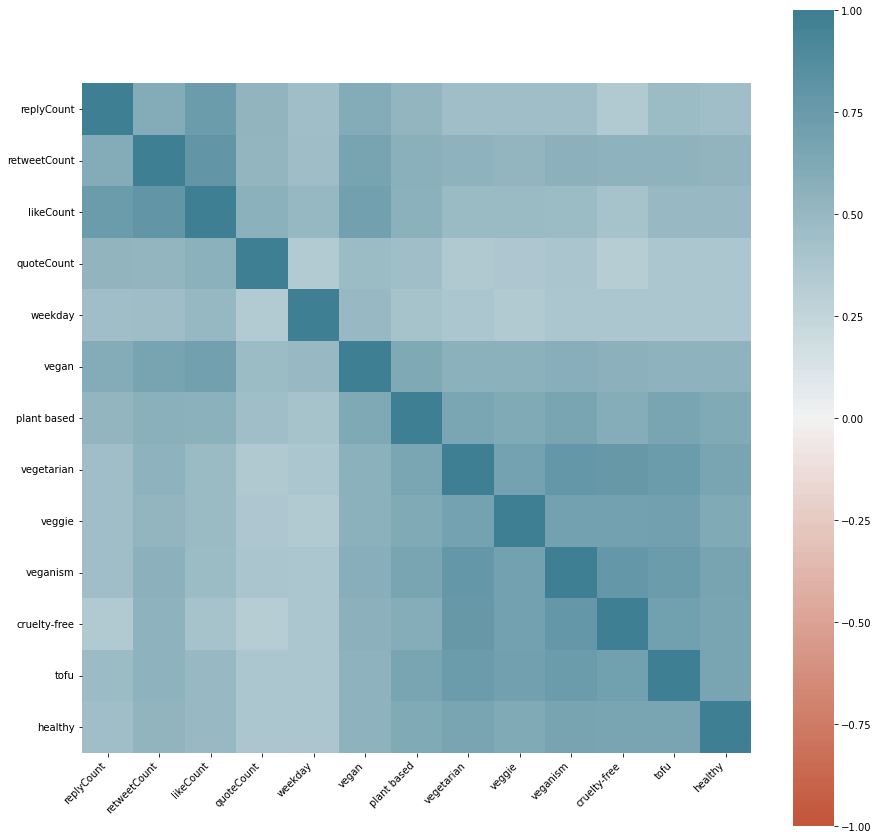

In [24]:
corr = dfagg[["replyCount","retweetCount","likeCount","quoteCount","weekday"]+list(kflags.keys())].corr(method='spearman')
plt.figure(figsize=(15,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

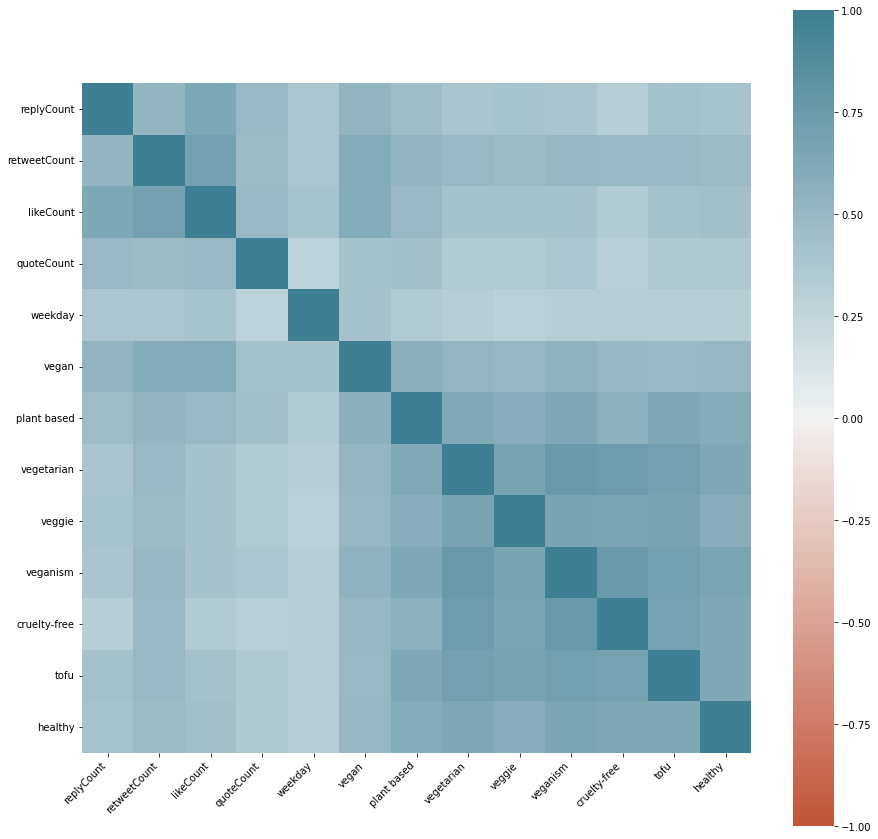

In [25]:
corr = dfagg[["replyCount","retweetCount","likeCount","quoteCount","weekday"]+list(kflags.keys())].corr(method='kendall')
plt.figure(figsize=(15,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [26]:
dfagg2 = df.groupby(["weekday"])[list(kflags.keys())].sum()

<AxesSubplot:xlabel='weekday'>

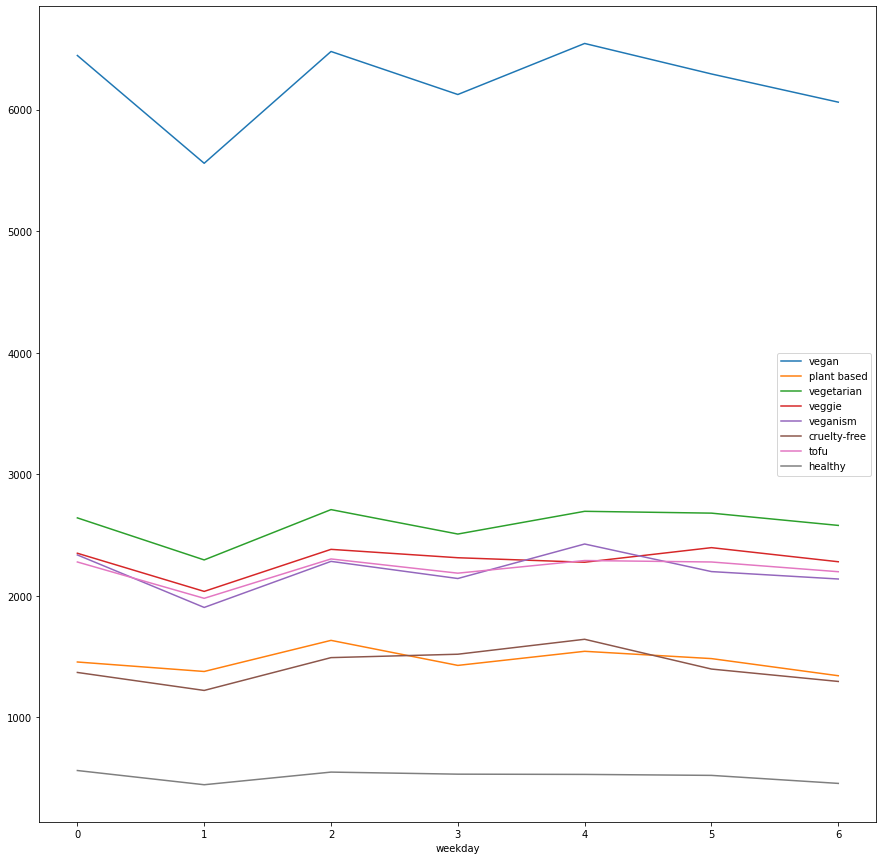

In [27]:
dfagg2.plot.line(figsize=(15,15))

In [28]:
res = {}
for year in df["year"].unique():
    res[year] = df[df["year"]==year].groupby(["month","day"]).sum()[["replyCount","retweetCount","likeCount","quoteCount","weekday"]+list(kflags.keys())].corr(method='kendall')

In [29]:
tt = []
for year in df["year"].unique():
    tt.append([res[year]["healthy"][kword] for kword in kflags.keys()])

healthy_corr = pd.DataFrame(tt, columns = [kword for kword in kflags.keys()], index = [year for year in df["year"].unique()])

<AxesSubplot:>

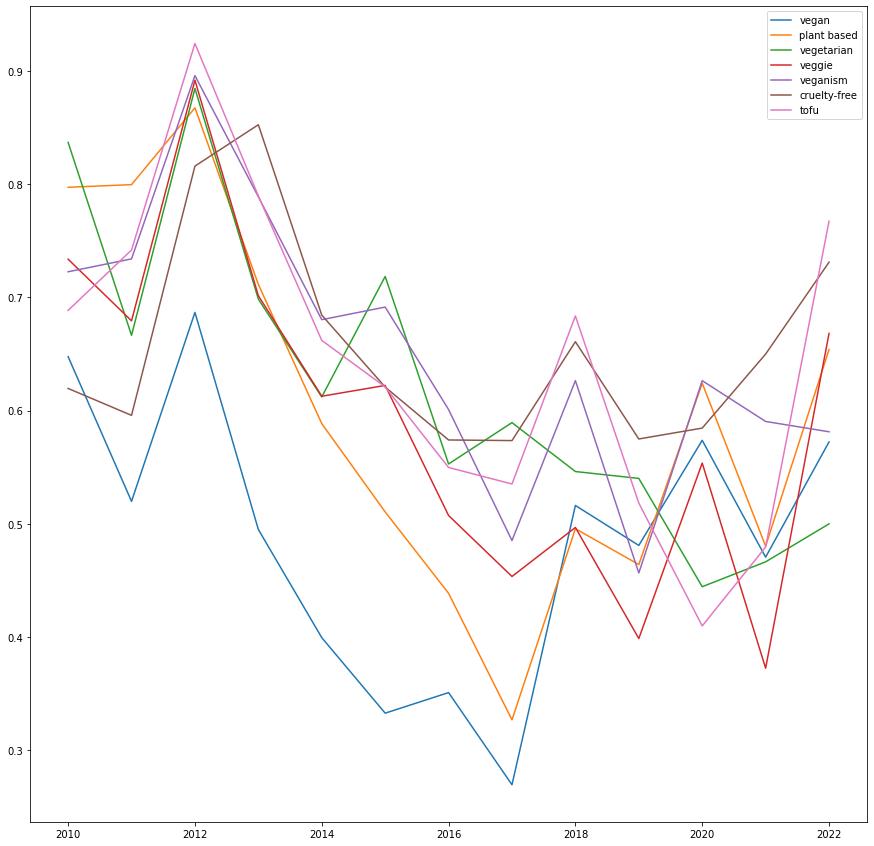

In [30]:
healthy_corr[["vegan","plant based","vegetarian","veggie","veganism","cruelty-free","tofu"]].plot.line(figsize=(15,15))

In [31]:
df_hyp = pd.read_pickle("./vegan_tweets2010-2022_monthly.pkl")
df_hyp["year"] = df_hyp["Datetime"].apply(lambda x: x.year)
df_hyp["month"] = df_hyp["Datetime"].apply(lambda x: x.month)
df_hyp["day"] = df_hyp["Datetime"].apply(lambda x: x.day)
df_hyp["weekday"] = df_hyp["Datetime"].apply(lambda x: x.weekday)
df_hyp["hour"] = df_hyp["Datetime"].apply(lambda x: x.hour)

In [32]:
kflags2 = {
"vegan-1":["vegan"], 
"vegan-4":["vegan","vegetarian","veggie","veganism"], 
"vegan-7":["vegan","vegetarian","veggie","veganism", "plantbased", "plant-based", "plant based", "plant milk", "plant-milk","plantmilk"], 
"healthy":[
    "healthy",
    "wholesome",
#     "rubicond",
#     "sound",
#     "hearty",
    "rock-loving",
#     "rock loving",
#     "rockloving",
    "full-blooded",
    "full blooded",
    "fullblooded",
#     "well-preserved"
]
}    

for field,kwords in kflags2.items():
    res = []
    for kword in kwords:
        res.append(df_hyp["Text"].str.contains(kword))
    if len(res)>1:
        for i in range(1,len(res)-1):
            res[0] = res[0] + res[i]
    df_hyp[field] = res[0]

In [33]:
df_hyp.head()

,Datetime,Tweet Id,Text,Username,Query,replyCount,retweetCount,likeCount,quoteCount,lang,...,mentionedUsers,year,month,day,weekday,hour,vegan-1,vegan-4,vegan-7,healthy
0,2010-01-30 23:59:47+00:00,8430272628,@Twinz2 Well help me understand how that relat...,IQXS,vegan,0,0,0,0,en,...,[https://twitter.com/Twinz2],2010,1,30,5,23,False,False,False,False
1,2010-01-30 23:58:21+00:00,8430226196,"okay, maybe i'm not making vegan alfredo saude...",desdemona,vegan,0,0,0,0,en,...,None,2010,1,30,5,23,True,True,True,False
2,2010-01-30 23:57:14+00:00,8430191199,Via @feelgoodguru: no oil #vegan pesto ~ easy-...,itsallgood3sm,vegan,0,0,0,0,en,...,[https://twitter.com/feelgoodguru],2010,1,30,5,23,True,True,True,False
3,2010-01-30 23:56:25+00:00,8430165062,Just had a delicious vegan meal @ Jean's Kitch...,RachelLagroix,vegan,0,0,0,0,en,...,None,2010,1,30,5,23,True,True,True,False
4,2010-01-30 23:56:19+00:00,8430161604,@SecretKGB says: I like how this BBQ sauce is ...,annesmash,vegan,0,0,0,0,en,...,[https://twitter.com/secretKGB],2010,1,30,5,23,True,True,True,False


In [34]:
df_hyp["vegan1+healthy"] = df_hyp["vegan-1"] * df_hyp["healthy"] 
df_hyp["vegan4+healthy"] = df_hyp["vegan-4"] * df_hyp["healthy"] 
df_hyp["vegan7+healthy"] = df_hyp["vegan-7"] * df_hyp["healthy"] 

In [35]:
res = {"healthy":df_hyp["healthy"].sum(),
       "vegan-1":df_hyp["vegan-1"].sum(),
       "vegan-4":df_hyp["vegan-4"].sum(),
       "vegan-7":df_hyp["vegan-7"].sum(),
       "vegan1+healthy":df_hyp["vegan1+healthy"].sum(),
       "vegan4+healthy":df_hyp["vegan4+healthy"].sum(),
       "vegan7+healthy":df_hyp["vegan7+healthy"].sum(),
       "total":len(df_hyp)}
print(res)


{'healthy': 2682, 'vegan-1': 32653, 'vegan-4': 53201, 'vegan-7': 65213, 'vegan1+healthy': 1359, 'vegan4+healthy': 1791, 'vegan7+healthy': 2252, 'total': 113677}


In [36]:
def mi(el):
    p11 = el[2]/el[3]
    p00 = (el[3]-el[0]-el[1]+el[2])/el[3]
    p10 = (el[0]-el[2])/el[3]
    p01 = (el[1]-el[2])/el[3]
    
    pa1 = (el[0]/el[3])
    pb1 = (el[1]/el[3])
    pa0 = ((el[3]-el[0])/el[3])
    pb0 = ((el[3]-el[1])/el[3])
    
    log11 = (np.log2( p11 / (pa1 * pb1) ) if (p11 / (pa1 * pb1))!=0 else 0 )
    log00 = ( np.log2( p00 / (pa0 * pb0)) if ( p00 / (pa0 * pb0))!=0 else 0 )
    log10 = (np.log2( p10 / (pa1 * pb0) ) if ( p10 / (pa1 * pb0) )!=0 else 0)
    log01 = (np.log2( p01 / (pa0 * pb1) ) if ( p01 / (pa0 * pb1) )!=0 else 0)
    
    return p11*log11 +p00*log00 +p10*log10 +p01*log01

res = []
for year in df["year"].unique():
    el = {}
    healthy = df_hyp[df_hyp["year"]==year]["healthy"].sum()
    vegan = df_hyp[df_hyp["year"]==year]["vegan-1"].sum()
    vegan_healthy = df_hyp[df_hyp["year"]==year]["vegan1+healthy"].sum()

    vegan1 = df_hyp[df_hyp["year"]==year]["vegan-4"].sum()
    vegan1_healthy = df_hyp[df_hyp["year"]==year]["vegan4+healthy"].sum()

    vegan4 = df_hyp[df_hyp["year"]==year]["vegan-7"].sum()
    vegan4_healthy = df_hyp[df_hyp["year"]==year]["vegan7+healthy"].sum()

    total = len(df_hyp[df_hyp["year"]==year])
    res.append((mi((healthy,vegan,vegan_healthy,total)),mi((healthy,vegan1,vegan1_healthy,total)),mi((healthy,vegan4,vegan4_healthy,total))))

In [37]:
vegan_healthy_mi = pd.DataFrame(res, columns=["vegan-1","vegan-4","vegan-7"],index=[year for year in df["year"].unique()])

<AxesSubplot:>

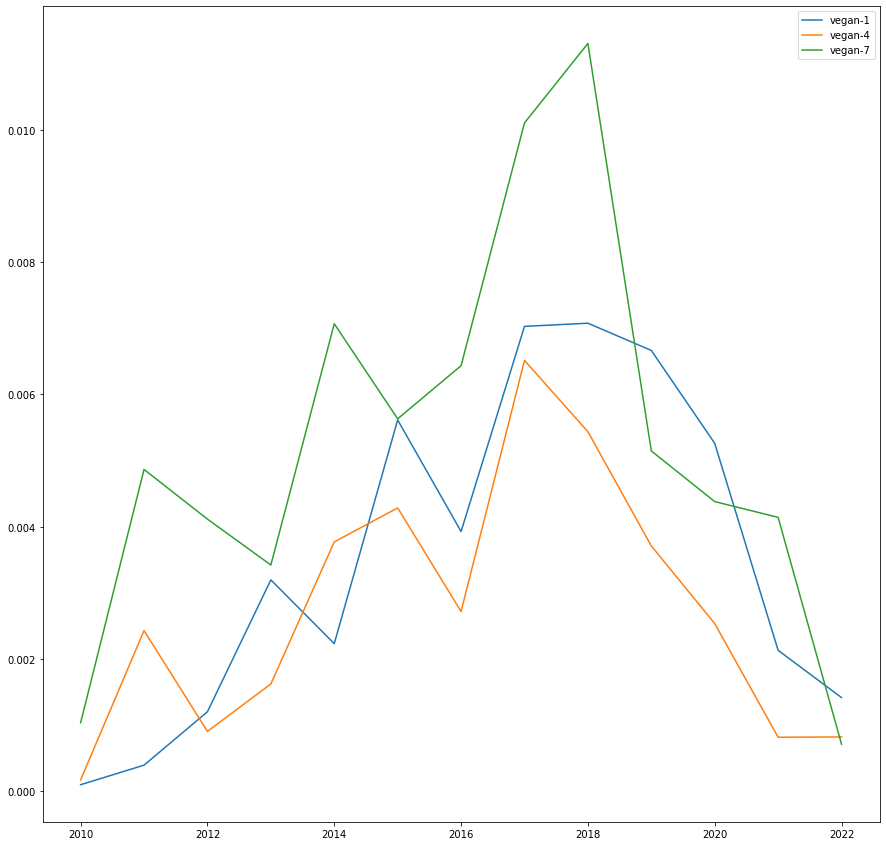

In [38]:
vegan_healthy_mi.plot.line(figsize=(15,15))

<AxesSubplot:>

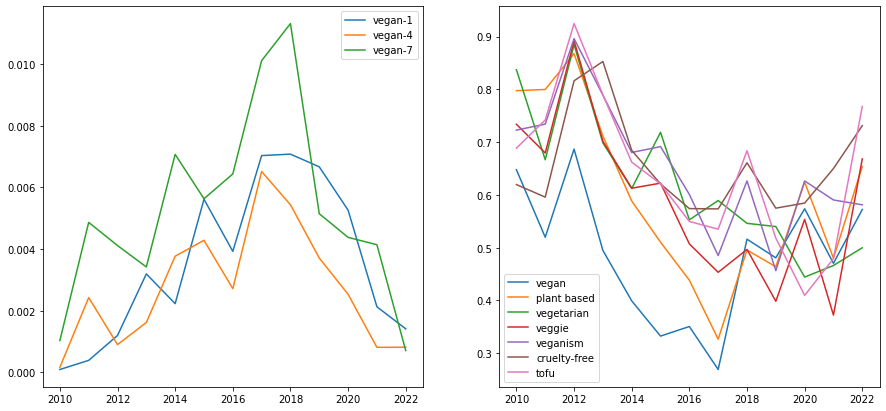

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
vegan_healthy_mi.plot.line(ax=axes[0])
healthy_corr[["vegan","plant based","vegetarian","veggie","veganism","cruelty-free","tofu"]].plot.line(ax=axes[1])
# df1.plot(ax=axes[0,0])
# df2.plot(ax=axes[0,1])